In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
batch_size = 128 #batch size as 128
num_classes = 100 # we got 100 classes dataset
epochs = 50 # iterations over dataset

In [ ]:
img_rows, img_cols = 32, 32

In [ ]:
#Channels first means that in a specific tensor (consider a photo), you would have (Number_Of_Channels, Height , Width).
# we convert channel first to channel last.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#Model Creation
inputs = Input(shape=(32, 32, 3))
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(inputs)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)

#Inception1
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_2 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception2
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_2 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_2)
conv_2 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


#Inception3
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_11 = Conv2D(32, (1,3), padding='same', activation='relu')(conv_1)
conv_12 = Conv2D(32, (3,1), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_21 = Conv2D(32, (1,3), padding='same', activation='relu')(conv_2)
conv_22 = Conv2D(32, (3,1), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_11,conv_12,conv_21,conv_22,conv_3,conv_4], axis=3)


X = Conv2D(32, 3, activation='relu')(X)
X = Conv2D(64, 3, activation='relu')(X)
X = AveragePooling2D(4)(X)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)
outputs = Dense(100, activation='softmax')(X)

model = Model(inputs, outputs)

In [ ]:

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   9248        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   9248        conv2d_1[0][0]                   
_______________________________________________________________________________________

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate = 0.001,clipvalue = 0.9),
              metrics=['accuracy'])

In [ ]:

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint("Inception_plain_Adam.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto',restore_best_weights=True)
#hist=model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test),callbacks=[early,checkpoint])
hist=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=50, validation_data=(x_test, y_test),callbacks=[early,checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
391/390 [==============================] - ETA: 0s - loss: 4.2203 - accuracy: 0.0500
Epoch 00001: val_accuracy improved from -inf to 0.12170, saving model to Inception_plain_Adam.hdf5
391/390 [==============================] - 45s 115ms/step - loss: 4.2203 - accuracy: 0.0500 - val_loss: 3.7385 - val_accuracy: 0.1217
Epoch 2/50
391/390 [==============================] - ETA: 0s - loss: 3.6561 - accuracy: 0.1347
Epoch 00002: val_accuracy improved from 0.12170 to 0.18810, saving model to Inception_plain_Adam.hdf5
391/390 [==============================] - 45s 116ms/step - loss: 3.6561 - accuracy: 0.1347 - val_loss: 3.4100 - val_accuracy: 0.1881
Epoch 3/50
391/390 [==============================] - ETA: 0s - loss: 3.4134 - accuracy: 0.1785
Epoch 00003: val_accuracy improved from 0.18810 to 0.21840, saving model to Inception_plain_Adam.hdf5
391/390 [==============================] - 45s 116ms/step - loss:

In [ ]:
# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
#print(classification_report(y_true,y_pred))
#confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.4759762613477358
Recall: 0.4681
Accuracy: 0.4681


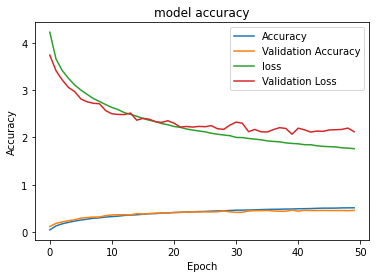

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# cell to load best weights

In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Model Creation
inputs = Input(shape=(32, 32, 3))
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(inputs)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)

#Inception1
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_2 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception2
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_2 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_2)
conv_2 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


#Inception3
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_11 = Conv2D(32, (1,3), padding='same', activation='relu')(conv_1)
conv_12 = Conv2D(32, (3,1), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_21 = Conv2D(32, (1,3), padding='same', activation='relu')(conv_2)
conv_22 = Conv2D(32, (3,1), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_11,conv_12,conv_21,conv_22,conv_3,conv_4], axis=3)


X = Conv2D(32, 3, activation='relu')(X)
X = Conv2D(64, 3, activation='relu')(X)
X = AveragePooling2D(4)(X)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)
outputs = Dense(100, activation='softmax')(X)

model = Model(inputs, outputs)

#model = create_model()
model.load_weights('../weights/InceptionV2_Adam_NoRegularization.hdf5')

y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))